# Pertemuan 10: Ensemble Stacking Machine Learning and Hyperparameter Tuning Optimization

### **Ensemble Learning**

**Ensemble learning** adalah teknik Machine Learning yang melibatkan penggabungan beberapa model individu untuk membuat model yang lebih kuat. Model baru ini seringkali lebih kokoh dan lebih akurat. Berbagai model machine learning mungkin beroperasi pada sampel data populasi yang berbeda, teknik pemodelan yang berbeda mungkin digunakan, dan hipotesis yang berbeda mungkin digunakan. Metode ensemble bertujuan untuk mengurangi varians dan bias dari model individu, membuat model yang digabungkan lebih generalisasi dan lebih baik dalam menangani berbagai jenis data. Proses pembuatan ensemble biasanya melibatkan pelatihan beberapa model pada dataset yang sama dan kemudian menggabungkan prediksi mereka dengan cara tertentu. 
Ada 3 jenis Ensemble Learning:
- Bagging<br>
- Boosting<br>
- Stacking<br>

Namun pada sesi ini kita hanya akan mempelajari Stacking.


#### **Stacking**


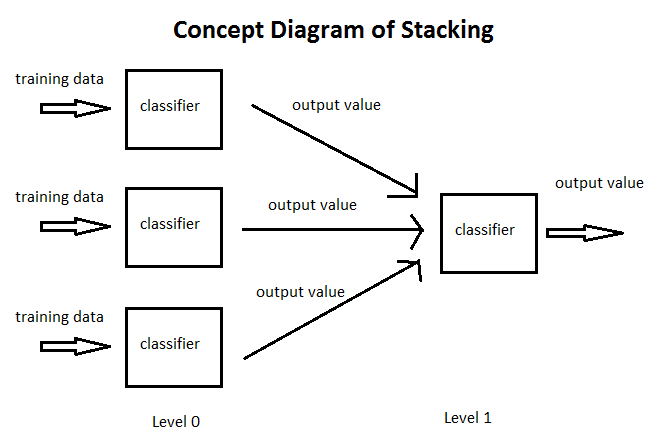</img>


Stacking adalah cara untuk menggabungkan beberapa model klasifikasi atau regresi. Ada banyak cara untuk menggabungkan model, teknik yang paling dikenal luas adalah Bagging atau Boosting. Bagging memungkinkan beberapa model serupa dengan variansi tinggi yang dirata-ratakan untuk mengurangi variansi. Boosting membangun beberapa model tambahan untuk mengurangi bias, sambil menjaga variansi tetap kecil.

Stacking adalah paradigma yang berbeda. Inti dari stacking adalah untuk menjelajahi ruang dari berbagai model untuk masalah yang sama. Idenya adalah bahwa Anda dapat mengatasi masalah pembelajaran dengan berbagai jenis model yang mampu mempelajari sebagian dari masalah, tetapi tidak seluruh ruang masalah. Jadi, Anda dapat membangun beberapa pembelajar berbeda dan menggunakannya untuk membuat prediksi sementara, satu prediksi untuk setiap model yang dipelajari. Kemudian Anda menambahkan model baru yang belajar dari prediksi sementara untuk target yang sama. Model akhir ini dikatakan ditumpuk di atas yang lain, sehingga dinamai stacking.

In [51]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

In [52]:
# Load Data
ads_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4PM%20-%20Social%20Network%20Ads.csv')

In [53]:
ads_df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [54]:
ads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [55]:
ads_df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [56]:
ads_df['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [57]:
# Splitting between `X` and `y`

X = ads_df.drop(['Purchased'], axis=1)
y = ads_df['Purchased']

In [58]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [59]:
# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Baseline Model**


In [60]:
# Define the base models for stacking ensemble
base_classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [61]:
# Define the meta-model
meta_model = LogisticRegression()

In [62]:
# Train the base classifiers
base_classifiers = [clf.fit(X_train_scaled, y_train) for clf in base_classifiers]

In [63]:
# Make predictions for both training and testing sets
y_pred_train_base = [clf.predict(X_train_scaled) for clf in base_classifiers]
y_pred_test_base = [clf.predict(X_test_scaled) for clf in base_classifiers]

In [64]:
# Create new feature sets by stacking the predictions
stacked_features_train = np.column_stack(y_pred_train_base)
stacked_features_test = np.column_stack(y_pred_test_base)

In [65]:
# Train the meta-model
meta_model.fit(stacked_features_train, y_train)

LogisticRegression()

In [66]:
# Make predictions using the meta-model
y_pred_train_meta = meta_model.predict(stacked_features_train)
y_pred_meta = meta_model.predict(stacked_features_test)

Stacking Ensemble - F1 Score - Test Set  :  0.8852459016393442 

Stacking Ensemble - Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        52
           1       0.82      0.96      0.89        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80
 



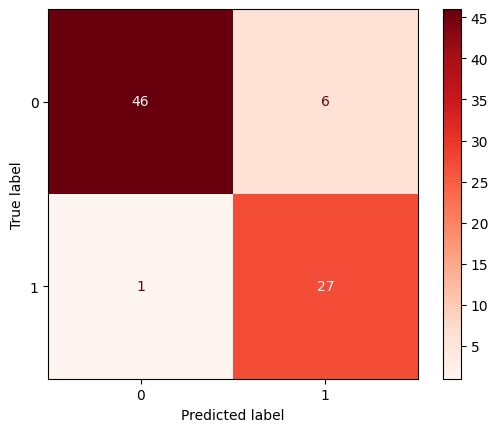

In [67]:
# Evaluate the performance of the stacking ensemble
print('Stacking Ensemble - F1 Score - Test Set  : ', f1_score(y_test, y_pred_meta), '\n')
print('Stacking Ensemble - Classification Report : \n', classification_report(y_test, y_pred_meta), '\n')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_meta, cmap='Reds')

### **Cross Validation**

<img src = "https://rahmadya.com/wp-content/uploads/2020/04/041720_1702_crossvalida1.png?w=863" width = 70%></img>


Cross-validation adalah teknik untuk memperkirakan kinerja model pada data yang belum terlihat. 
Manfaat dari Cross-validation adalah:
1. Cross-validation secara sistematis membuat dan mengevaluasi beberapa model pada beberapa subset dari kumpulan data.
2. Memberikan pengukuran kinerja seperti mean dan standar deviasi.  
 - mean: seberapa baik prosedur tersebut berperforma secara rata-rata.   
 - standar deviasi: seberapa besar variasi yang diharapkan dari prosedur tersebut dalam praktiknya.
3. Mean dan Standard Deviation dapat digunakan untuk memberikan interval kepercayaan pada kinerja yang diharapkan di set pengujian.


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Cross-validation for stacking ensemble
f1_train_cross_val = cross_val_score(meta_model, stacked_features_train, y_train, cv=5, scoring='f1')
print('Stacking Ensemble - F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('Stacking Ensemble - F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('Stacking Ensemble - F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('Stacking Ensemble - F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean() - f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean() + f1_train_cross_val.std()))

Stacking Ensemble - F1 Score - All - Cross Validation  :  [1.         1.         0.97777778 0.97777778 1.        ]
Stacking Ensemble - F1 Score - Mean - Cross Validation :  0.9911111111111112
Stacking Ensemble - F1 Score - Std - Cross Validation  :  0.010886621079036363
Stacking Ensemble - F1 Score - Range of Test-Set       :  0.9802244900320748 - 1.0019977321901474


In [70]:
f1_train_cross_val.mean()

0.9911111111111112

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

result = cross_val_predict(meta_model, stacked_features_train, y_train, cv = 5)

report = classification_report(y_train, result)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       205
           1       1.00      0.98      0.99       115

    accuracy                           0.99       320
   macro avg       1.00      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



### **Hyperparameter Tuning**

Setiap algoritma memiliki hyperparameter mereka sendiri. **Hyperparameter** adalah variabel konfigurasi eksternal yang digunakan untuk mengelola model Machine Learning selama fase pelatihan. Hyperparameter biasanya dipilih berdasarkan masalah yang sedang dipelajari atau melalui eksperimen dan *grid search* untuk menemukan nilai yang optimal. Perbedaan utama antara hyperparameter dan parameter adalah bahwa hyperparameter mengontrol proses pelatihan model sedangkan parameter adalah bagian dari model itu sendiri yang ditemukan selama pelatihan, seperti bias, bobot dan lain-lain. Contoh, algoritma Random Forest:
- Hyperparameter: Number of trees, maximum depth of trees, minimum samples split.
- Parameter: Decision rules in each tree, feature subsets

Hyperparameter dapat memiliki dampak besar pada kinerja algoritma pembelajaran. Pengaturan hyperparameter seringkali berbeda untuk setiap kumpulan data. Oleh karena itu, mereka harus dioptimalkan untuk setiap kumpulan data.Proses menemukan hyperparameter terbaik untuk suatu kumpulan data tertentu disebut Hyperparameter Optimization atau Hyperparameter Tuning. Tantangan dalam melakukan ini adalah:
1. Tidak ada formula pasti untuk menemukan hyperparameter. Diperlukan eksperimen dan evaluasi berulang untuk menemukan kombinasi yang optimal.
2. Harus mencoba berbagai kombinasi hyperparameter dan mengevaluasi kinerja model.

Selama melakukan Proses ini biasanya data akan dibagi menjadi beberapa bagian salah satunya yaitu dengan Cross Validation agar mendapatkan hasil evaluasi yang tepat dan akurat.



### **Algoritma Hyperparameter**

<p align="center">
  <img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width="45%"></img>
  <img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-7.png" width="45%"></img>
</p>


Sebelum mencoba berbagai kombinasi hyperparameter, ada beberapa hal yang perlu dipertimbangkan:
1. Jumlah hyperparameter dari algoritma Machine Learning.
2. Ketersediaan sumber daya seperti sumber daya komputasi dan ukuran dataset.
3. Batas waktu yang tersedia untuk melakukan optimasi hyperparameter.

Ada dua algoritma paling populer yang dapat digunakan untuk melakukan Penyetelan Hyperparameter:
1. Grid Search: <br>
➔Metode ini akan melatih setiap kombinasi nilai hyperparameter yang telah diatur. <br>
➔Karena metode ini menggunakan setiap kombinasi untuk membangun dan mengevaluasi kinerja model, metode ini sangat mahal secara komputasi. 
2. Random Search: <br>
➔Metode ini akan melatih kombinasi acak dari hyperparameter.<br>
➔Tidak semua kombinasi mungkin akan dilatih.<br>
➔Biasanya diterapkan jika dataset besar.


#### **Manual Hyperparameter**

In [72]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Manual Hyperparameter Tuning
# RandomForest with manual hyperparameters
rf_ms = RandomForestClassifier(n_estimators=300, min_samples_leaf=10, random_state=10)
rf_ms.fit(X_train_scaled, y_train)

# GradientBoosting with manual hyperparameters
gb_ms = GradientBoostingClassifier(n_estimators=300, min_samples_leaf=10, random_state=10)
gb_ms.fit(X_train_scaled, y_train)

# Meta-model with manual hyperparameters
meta_model_ms = LogisticRegression(C=0.1)

# Create the StackingClassifier
stacking_clf_ms = StackingClassifier(
    estimators=[('rf', rf_ms), ('gb', gb_ms)],
    final_estimator=meta_model_ms
)

# Train the StackingClassifier with manual hyperparameters
stacking_clf_ms.fit(X_train_scaled, y_train)

# Make predictions for manual hyperparameter tuning model
y_pred_train_manual = stacking_clf_ms.predict(X_train_scaled)
y_pred_test_manual = stacking_clf_ms.predict(X_test_scaled)

In [73]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# RandomForest with manual hyperparameters
rf_ms = RandomForestClassifier(n_estimators=300, min_samples_leaf=10, random_state=10)
rf_ms.fit(X_train_scaled, y_train)

# GradientBoosting with manual hyperparameters
gb_ms = GradientBoostingClassifier(n_estimators=300, min_samples_leaf=10, random_state=10)
gb_ms.fit(X_train_scaled, y_train)

# Meta-model with manual hyperparameters
meta_model_ms = LogisticRegression(C=0.1)

# Create the StackingClassifier
stacking_clf_ms = StackingClassifier(
    estimators=[('rf', rf_ms), ('gb', gb_ms)],
    final_estimator=meta_model_ms
)

# Train the StackingClassifier with manual hyperparameters
stacking_clf_ms.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ms = stacking_clf_ms.predict(X_test_scaled)


Manual Hyperparameter Tuning - F1 Score - Test Set  :  0.9 

Manual Hyperparameter Tuning - Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        52
           1       0.84      0.96      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80
 



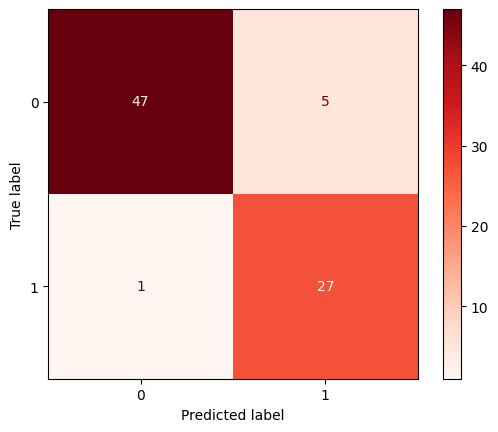

In [74]:
# Evaluate the performance of the manual hyperparameter model
print('Manual Hyperparameter Tuning - F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_manual), '\n')
print('Manual Hyperparameter Tuning - Classification Report : \n', classification_report(y_test, y_pred_test_manual), '\n')
ConfusionMatrixDisplay.from_estimator(stacking_clf_ms, X_test_scaled, y_test, cmap='Reds')

In [75]:
# Cross Validation using `cross_val_score`
f1_train_cross_val_manual = cross_val_score(stacking_clf_ms,
                                            X_train_scaled,
                                            y_train,
                                            cv=3,
                                            scoring="f1")

print('Manual Hyperparameter Tuning - F1 Score - All - Cross Validation  : ', f1_train_cross_val_manual)
print('Manual Hyperparameter Tuning - F1 Score - Mean - Cross Validation : ', f1_train_cross_val_manual.mean())
print('Manual Hyperparameter Tuning - F1 Score - Std - Cross Validation  : ', f1_train_cross_val_manual.std())
print('Manual Hyperparameter Tuning - F1 Score - Range of Test-Set       : ', (f1_train_cross_val_manual.mean() - f1_train_cross_val_manual.std()) , '-', (f1_train_cross_val_manual.mean() + f1_train_cross_val_manual.std()))


Manual Hyperparameter Tuning - F1 Score - All - Cross Validation  :  [0.85714286 0.82857143 0.75675676]
Manual Hyperparameter Tuning - F1 Score - Mean - Cross Validation :  0.8141570141570141
Manual Hyperparameter Tuning - F1 Score - Std - Cross Validation  :  0.04223090333602405
Manual Hyperparameter Tuning - F1 Score - Range of Test-Set       :  0.77192611082099 - 0.8563879174930382


In [76]:
result = cross_val_predict(stacking_clf_ms,
                                            X_train_scaled,
                                            y_train,
                                            cv=3)

print(classification_report(result, y_train))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       214
           1       0.78      0.85      0.81       106

    accuracy                           0.87       320
   macro avg       0.85      0.87      0.86       320
weighted avg       0.88      0.87      0.87       320



In [77]:
# Function to save classification report into a dictionary
def performance_report(report_dict, y_train, y_pred_train, y_test, y_pred_test, model_name):
    report_dict[model_name] = {
        'Train Precision': precision_score(y_train, y_pred_train),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Train F1 Score': f1_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Test F1 Score': f1_score(y_test, y_pred_test)
    }
    return report_dict

# Save Classification Report into a Dictionary for both models
all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train_meta, y_test, y_pred_meta, 'Stacking Ensemble')
all_reports = performance_report(all_reports, y_train, y_pred_train_manual, y_test, y_pred_test_manual, 'Manual Search')
pd.DataFrame(all_reports)

,Stacking Ensemble,Manual Search
Train Precision,1.000000,0.946429
Train Recall,0.982609,0.921739
Train Accuracy,0.993750,0.953125
Train F1 Score,0.991228,0.933921
Test Precision,0.818182,0.843750
Test Recall,0.964286,0.964286
Test Accuracy,0.912500,0.925000
Test F1 Score,0.885246,0.900000


#### **Random Search**

In [78]:
# Hyperparameter Tuning : Random Search
from sklearn.model_selection import RandomizedSearchCV

In [79]:
# Define Hyperparameters for Random Forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]
max_depth = [int(x) for x in np.linspace(10, 1000, 5)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

random_search_params_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [80]:
print(n_estimators)
print(max_depth)

[200, 650, 1100, 1550, 2000]
[10, 257, 505, 752, 1000]


In [81]:
# Define Hyperparameters for Gradient Boosting
random_search_params_gb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [82]:
# Random Search for Random Forest
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10), 
                               param_distributions=random_search_params_rf, 
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 257, 505, 752, 1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [83]:
# Random Search for Gradient Boosting
gb_random = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=10), 
                               param_distributions=random_search_params_gb, 
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
gb_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 257, 505, 752, 1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [84]:
# Best parameters from Random Search
print("Best parameters for Random Forest: ", rf_random.best_params_)
print("Best parameters for Gradient Boosting: ", gb_random.best_params_)

Best parameters for Random Forest:  {'n_estimators': 1550, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 752}
Best parameters for Gradient Boosting:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}


In [85]:
# Train models with best parameters
rf_rs = rf_random.best_estimator_
gb_rs = gb_random.best_estimator_

In [86]:
# Meta-model for Random Search
meta_model_rs = LogisticRegression(C=0.1)

In [87]:
# Create the StackingClassifier for Random Search
stacking_clf_rs = StackingClassifier(
    estimators=[('rf', rf_rs), ('gb', gb_rs)],
    final_estimator=meta_model_rs
)

In [88]:
# Train the StackingClassifier with random search hyperparameters
stacking_clf_rs.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=752,
                                                       min_samples_leaf=8,
                                                       min_samples_split=5,
                                                       n_estimators=1550,
                                                       random_state=10)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=10,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           n_estimators=200,
                                                           random_state=10))],
                   final_estimator=LogisticRegression(C=0.1))

In [89]:
# Make predictions for random search hyperparameter tuning model
y_pred_train_rs = stacking_clf_rs.predict(X_train_scaled)
y_pred_test_rs = stacking_clf_rs.predict(X_test_scaled)

Random Search Hyperparameter Tuning - F1 Score - Test Set  :  0.8813559322033898 

Random Search Hyperparameter Tuning - Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80
 



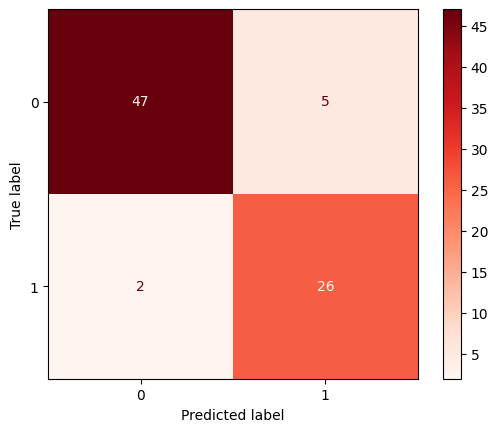

In [90]:
# Evaluate the performance of the random search hyperparameter model
print('Random Search Hyperparameter Tuning - F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_rs), '\n')
print('Random Search Hyperparameter Tuning - Classification Report : \n', classification_report(y_test, y_pred_test_rs), '\n')
ConfusionMatrixDisplay.from_estimator(stacking_clf_rs, X_test_scaled, y_test, cmap='Reds')

In [93]:
# Cross Validation using `cross_val_score`
f1_train_cross_val_rs = cross_val_score(stacking_clf_rs,
                                        X_train_scaled,
                                        y_train,
                                        cv=3,
                                        scoring="f1_macro")

print('Random Search Hyperparameter Tuning - F1 Score - All - Cross Validation  : ', f1_train_cross_val_rs)
print('Random Search Hyperparameter Tuning - F1 Score - Mean - Cross Validation : ', f1_train_cross_val_rs.mean())
print('Random Search Hyperparameter Tuning - F1 Score - Std - Cross Validation  : ', f1_train_cross_val_rs.std())
print('Random Search Hyperparameter Tuning - F1 Score - Range of Test-Set       : ', (f1_train_cross_val_rs.mean() - f1_train_cross_val_rs.std()) , '-', (f1_train_cross_val_rs.mean() + f1_train_cross_val_rs.std()))

Random Search Hyperparameter Tuning - F1 Score - All - Cross Validation  :  [0.87895928 0.853482   0.81540248]
Random Search Hyperparameter Tuning - F1 Score - Mean - Cross Validation :  0.8492812519760585
Random Search Hyperparameter Tuning - F1 Score - Std - Cross Validation  :  0.026116424143112636
Random Search Hyperparameter Tuning - F1 Score - Range of Test-Set       :  0.8231648278329459 - 0.8753976761191712


In [94]:
f1_train_cross_val_rs = cross_val_predict(stacking_clf_rs,
                                        X_train_scaled,
                                        y_train,
                                        cv=3)

print(classification_report(y_train, f1_train_cross_val_rs))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       205
           1       0.82      0.79      0.81       115

    accuracy                           0.86       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.86      0.86      0.86       320



In [38]:
# Function to save classification report into a dictionary
def performance_report(report_dict, y_train, y_pred_train, y_test, y_pred_test, model_name):
    report_dict[model_name] = {
        'Train Precision': precision_score(y_train, y_pred_train),
        'Train Recall': recall_score(y_train, y_pred_train),
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Train F1 Score': f1_score(y_train, y_pred_train),
        'Test Precision': precision_score(y_test, y_pred_test),
        'Test Recall': recall_score(y_test, y_pred_test),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Test F1 Score': f1_score(y_test, y_pred_test)
    }
    return report_dict

# Save Classification Report into a Dictionary for all models
all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train_meta, y_test, y_pred_meta, 'Stacking Ensemble Default Parameter')
all_reports = performance_report(all_reports, y_train, y_pred_train_manual, y_test, y_pred_test_manual, 'Stacking Ensemble with Manual Search')
pd.DataFrame(all_reports)
all_reports = performance_report(all_reports, y_train, y_pred_train_manual, y_test, y_pred_test_rs, 'Stacking Ensemble with Random Search')
pd.DataFrame(all_reports)

,Stacking Ensemble Default Parameter,Stacking Ensemble with Manual Search,Stacking Ensemble with Random Search
Train Precision,0.991304,0.946429,0.946429
Train Recall,0.991304,0.921739,0.921739
Train Accuracy,0.993750,0.953125,0.953125
Train F1 Score,0.991304,0.933921,0.933921
Test Precision,0.812500,0.843750,0.838710
Test Recall,0.928571,0.964286,0.928571
Test Accuracy,0.900000,0.925000,0.912500
Test F1 Score,0.866667,0.900000,0.881356


#### **Grid Search**

In [39]:
# Hyperparameter Tuning : Grid Search
from sklearn.model_selection import GridSearchCV

In [44]:
# Gunakan kembali hyperparameter terbaik dari RandomSearch untuk efisiensi
grid_search_params_rf = {
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100,
                     rf_random.best_params_['n_estimators'] - 50,
                     rf_random.best_params_['n_estimators'],
                     rf_random.best_params_['n_estimators'] + 50,
                     rf_random.best_params_['n_estimators'] + 100],
    'max_depth': [rf_random.best_params_['max_depth']],
    'min_samples_split': [rf_random.best_params_['min_samples_split'],
                          rf_random.best_params_['min_samples_split'] + 1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'],
                         rf_random.best_params_['min_samples_leaf'] + 2,
                         rf_random.best_params_['min_samples_leaf'] + 4],
}

In [45]:
# Gunakan kembali hyperparameter terbaik dari RandomSearch untuk efisiensi
grid_search_params_gb = {
    'n_estimators': [gb_random.best_params_['n_estimators'] - 100,
                     gb_random.best_params_['n_estimators'] - 50,
                     gb_random.best_params_['n_estimators'],
                     gb_random.best_params_['n_estimators'] + 50,
                     gb_random.best_params_['n_estimators'] + 100],
    'max_depth': [gb_random.best_params_['max_depth']],
    'min_samples_split': [gb_random.best_params_['min_samples_split'],
                          gb_random.best_params_['min_samples_split'] + 1,
                          gb_random.best_params_['min_samples_split'] + 2],
    'min_samples_leaf': [gb_random.best_params_['min_samples_leaf'],
                         gb_random.best_params_['min_samples_leaf'] + 2,
                         gb_random.best_params_['min_samples_leaf'] + 4],
}

In [46]:
# Grid Search for Random Forest
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=10), 
                       param_grid=grid_search_params_rf, 
                       cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [752], 'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [5, 6, 7],
                         'n_estimators': [1450, 1500, 1550, 1600, 1650]},
             verbose=2)

In [47]:
# Grid Search for Gradient Boosting
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state=10), 
                       param_grid=grid_search_params_gb, 
                       cv=3, verbose=2, n_jobs=-1)
gb_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=2)

In [48]:
# Best parameters from Grid Search
print("Best parameters for Random Forest (Grid Search): ", rf_grid.best_params_)
print("Best parameters for Gradient Boosting (Grid Search): ", gb_grid.best_params_)

Best parameters for Random Forest (Grid Search):  {'max_depth': 752, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 1550}
Best parameters for Gradient Boosting (Grid Search):  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [49]:
# Train models with best parameters
rf_gs = rf_grid.best_estimator_
gb_gs = gb_grid.best_estimator_

In [50]:
# Meta-model for Grid Search
meta_model_gs = LogisticRegression(C=0.1)

In [51]:
# Create the StackingClassifier for Grid Search
stacking_clf_gs = StackingClassifier(
    estimators=[('rf', rf_gs), ('gb', gb_gs)],
    final_estimator=meta_model_gs
)

In [52]:
# Train the StackingClassifier with grid search hyperparameters
stacking_clf_gs.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=752,
                                                       min_samples_leaf=8,
                                                       min_samples_split=5,
                                                       n_estimators=1550,
                                                       random_state=10)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=10,
                                                           min_samples_leaf=2,
                                                           min_samples_split=10,
                                                           n_estimators=200,
                                                           random_state=10))],
                   final_estimator=LogisticRegression(C=0.1))

In [53]:
# Make predictions for grid search hyperparameter tuning model
y_pred_train_gs = stacking_clf_gs.predict(X_train_scaled)
y_pred_test_gs = stacking_clf_gs.predict(X_test_scaled)

Grid Search Hyperparameter Tuning - F1 Score - Test Set  :  0.8813559322033898 

Grid Search Hyperparameter Tuning - Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80
 



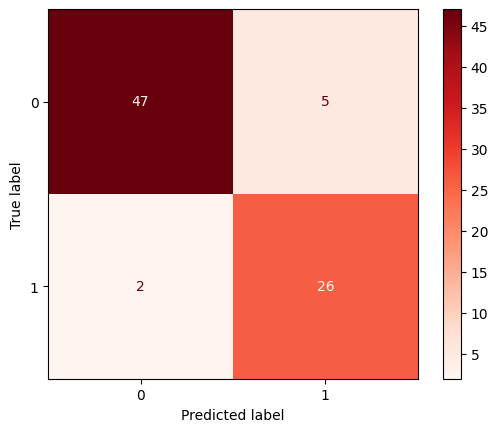

In [54]:
# Evaluate the performance of the grid search hyperparameter model
print('Grid Search Hyperparameter Tuning - F1 Score - Test Set  : ', f1_score(y_test, y_pred_test_gs), '\n')
print('Grid Search Hyperparameter Tuning - Classification Report : \n', classification_report(y_test, y_pred_test_gs), '\n')
ConfusionMatrixDisplay.from_estimator(stacking_clf_gs, X_test_scaled, y_test, cmap='Reds')

In [55]:
# Cross Validation using `cross_val_score`
f1_train_cross_val_gs = cross_val_score(stacking_clf_gs,
                                        X_train_scaled,
                                        y_train,
                                        cv=3,
                                        scoring="f1")

print('Grid Search Hyperparameter Tuning - F1 Score - All - Cross Validation  : ', f1_train_cross_val_gs)
print('Grid Search Hyperparameter Tuning - F1 Score - Mean - Cross Validation : ', f1_train_cross_val_gs.mean())
print('Grid Search Hyperparameter Tuning - F1 Score - Std - Cross Validation  : ', f1_train_cross_val_gs.std())
print('Grid Search Hyperparameter Tuning - F1 Score - Range of Test-Set       : ', (f1_train_cross_val_gs.mean() - f1_train_cross_val_gs.std()) , '-', (f1_train_cross_val_gs.mean() + f1_train_cross_val_gs.std()))

Grid Search Hyperparameter Tuning - F1 Score - All - Cross Validation  :  [0.84615385 0.80555556 0.76315789]
Grid Search Hyperparameter Tuning - F1 Score - Mean - Cross Validation :  0.8049557654820813
Grid Search Hyperparameter Tuning - F1 Score - Std - Cross Validation  :  0.03388560952186637
Grid Search Hyperparameter Tuning - F1 Score - Range of Test-Set       :  0.7710701559602149 - 0.8388413750039476


In [56]:
# Save Classification Report into a Dictionary for all models
all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train_meta, y_test, y_pred_meta, 'Stacking Ensemble Default Parameter')
all_reports = performance_report(all_reports, y_train, y_pred_train_manual, y_test, y_pred_test_manual, 'Stacking Ensemble with Manual Search')
pd.DataFrame(all_reports)
all_reports = performance_report(all_reports, y_train, y_pred_train_manual, y_test, y_pred_test_rs, 'Stacking Ensemble with Random Search')
pd.DataFrame(all_reports)
all_reports = performance_report(all_reports, y_train, y_pred_train_gs, y_test, y_pred_test_gs, 'Stacking Ensemble with Grid Search')
pd.DataFrame(all_reports)

,Stacking Ensemble Default Parameter,Stacking Ensemble with Manual Search,Stacking Ensemble with Random Search,Stacking Ensemble with Grid Search
Train Precision,0.991304,0.946429,0.946429,0.990741
Train Recall,0.991304,0.921739,0.921739,0.930435
Train Accuracy,0.993750,0.953125,0.953125,0.971875
Train F1 Score,0.991304,0.933921,0.933921,0.959641
Test Precision,0.812500,0.843750,0.838710,0.838710
Test Recall,0.928571,0.964286,0.928571,0.928571
Test Accuracy,0.900000,0.925000,0.912500,0.912500
Test F1 Score,0.866667,0.900000,0.881356,0.881356
